In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salary_train = pd.read_csv(r"C:\Users\HEMA GORANTLA\Desktop\naive bayes\SalaryData_Test.csv")
salary_test = pd.read_csv(r"C:\Users\HEMA GORANTLA\Desktop\naive bayes\SalaryData_Train.csv")

In [4]:
print(salary_train.shape)
salary_train.sample(1)

(15060, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
11513,37,Federal-gov,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K


In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_train.duplicated().sum()

930

In [10]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
salary_train.drop_duplicates(inplace=True)

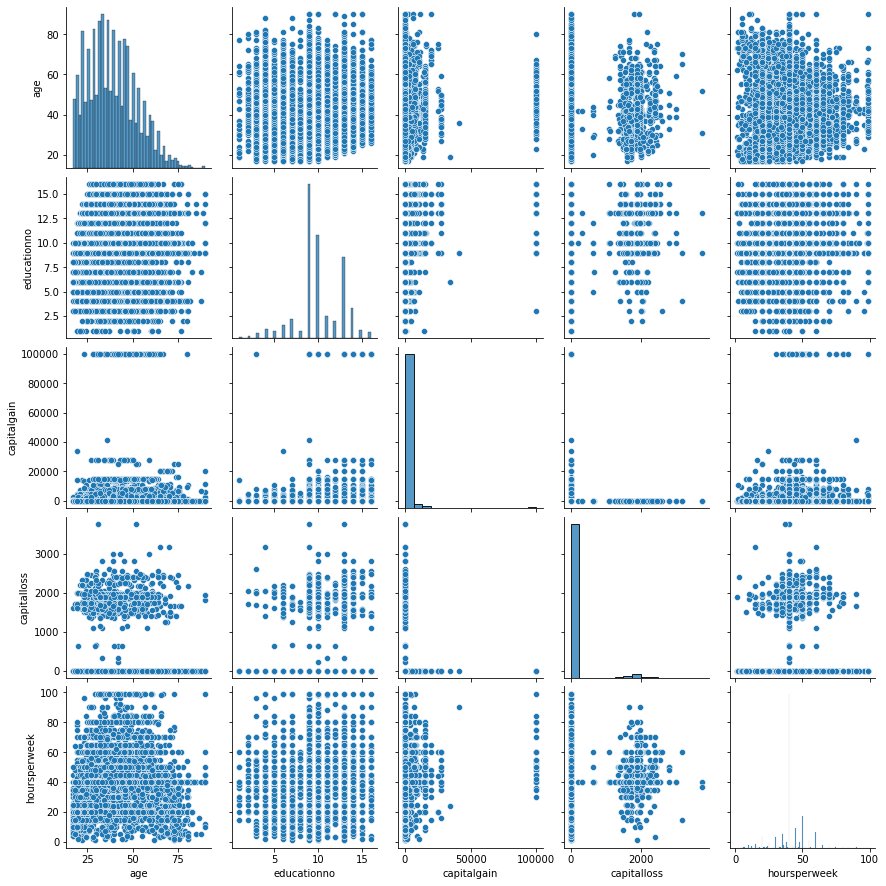

In [12]:
sns.pairplot(salary_train)

                   age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.021979     0.076765     0.053172      0.088090
educationno   0.021979     1.000000     0.132346     0.085651      0.127779
capitalgain   0.076765     0.132346     1.000000    -0.033929      0.089512
capitalloss   0.053172     0.085651    -0.033929     1.000000      0.056353
hoursperweek  0.088090     0.127779     0.089512     0.056353      1.000000


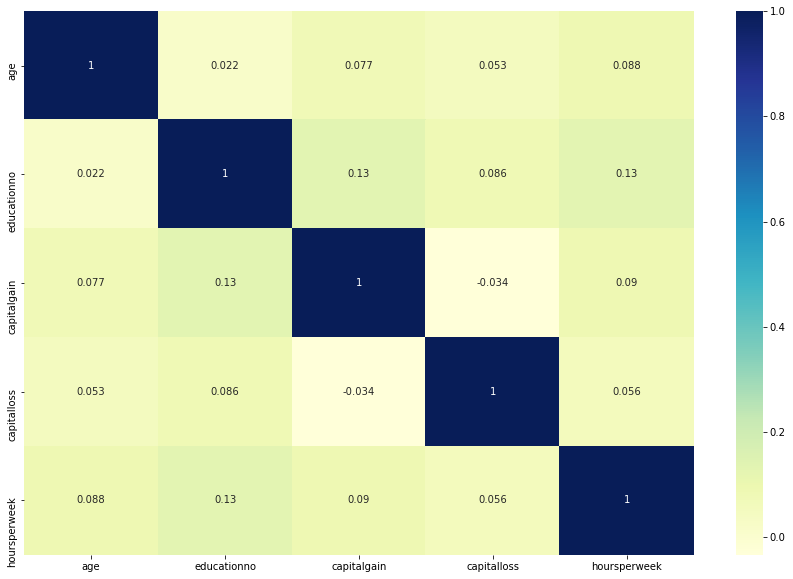

In [13]:
# increasing figure size:
plt.figure(figsize=(15,10))

print(salary_train.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(salary_train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [15]:
# Feature and Target devision:-

# feature:- X
X = salary_train.iloc[:,0:-1]

# Target:- Y
Y = salary_train.iloc[:,-1]

#show
print(X.shape)
X.head(1)

(14130, 13)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States


dataset

In [16]:
X_en = pd.get_dummies(X)

print(X.info())
X_en.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.5+ MB
None


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
2526,38,13,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12844,19,7,0,0,18,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
228,47,9,0,0,70,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2398,44,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13114,34,8,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Object:-
mm = MinMaxScaler()

X_train = pd.DataFrame(mm.fit_transform(X_en))
X_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
7851,0.082192,0.600000,0.0,0.000000,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1112,0.383562,0.733333,0.0,0.421751,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9521,0.109589,0.533333,0.0,0.000000,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,0.219178,0.533333,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6212,0.027397,0.600000,0.0,0.000000,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10230,0.219178,0.533333,0.0,0.000000,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6608,0.232877,0.600000,0.0,0.000000,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58,0.410959,0.533333,0.0,0.000000,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2343,0.534247,0.600000,0.0,0.000000,0.316327,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6976,0.095890,0.800000,0.0,0.000000,0.448980,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#gussian model

In [20]:
# Train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# Object Making:-
gnb = GaussianNB()

#fit the Mode:-
gnb.fit(X_train,Y_train)

GaussianNB()

In [21]:
print(salary_test.isnull().sum())

print("Duplicates"," ",salary_test.duplicated().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
Duplicates   3258


In [22]:
salary_test.drop_duplicates(inplace= True)

In [23]:
X = salary_test.iloc[:,0:-1] # feature
Y = salary_test.iloc[:,-1]   # target

In [24]:
# Encoading:-

X = pd.get_dummies(X)
Y_test = le.fit_transform(Y)

In [25]:
# Scaling:-

X_test = mm.fit_transform(X)


In [26]:
# prediction:-

Y_pred = gnb.predict(X_test)

Y_pred

array([1, 1, 1, ..., 1, 0, 1])

# accurecy check

In [27]:
from sklearn.metrics import accuracy_score

print("Model Accuray Score:","  ",accuracy_score(Y_test,Y_pred))

Model Accuray Score:    0.5725383786194849


In [28]:
Y_pred_train = gnb.predict(X_train)

Y_pred_train

array([0, 1, 1, ..., 1, 1, 1])

In [29]:
print("Training-set Accuracy","  ",accuracy_score(Y_train,Y_pred_train))

Training-set Accuracy    0.5666666666666667


# By using Multinominal Naive Bayes:-

In [30]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train,Y_train)

Y_pred_mnb = mnb.predict(X_test)

Y_pred_mnb

array([0, 1, 0, ..., 0, 0, 1])

In [31]:
print("Model Accuray Score:","  ",accuracy_score(Y_test,Y_pred_mnb))

Model Accuray Score:    0.7948927628888971


# conclusion

MultinominalNB model perform better than Gaussian Naive bayes.